# CS-746-FALL 2023

# Perspectives on Data Science

# PROJECT

Downloaded a copy of the current questionnaire results from here: 
https://docs.google.com/spreadsheets/d/1I9UtBsgTWwRRuJQC2JXM3FmypKmSkonvdrVu0WkM0Gg/edit#gid=0

**Topic : PREDICTION OF A PERSONS SATISFACTION LEVEL ON APARTMENTS DATA**

A dataset on residences has been created for potential international students interested in enrolling at Wichita State University. We, the students, produced the dataset using Google Forms on our own and distributed it to our friends. The dataset is divided into 47 columns, each of which contains a unique question about each person's current way of life in Wichita. The overall score that a person gives their apartment is the predictor or dependent variable. It has a scale from 1 to 5.

#### LOAD THE DATA

In [54]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Read CSV file into a Pandas DataFrame
data = pd.read_csv('questionnaire_responses.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 42 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                 1199 non-null   object 
 1   Are you an international student?                                                                                         1199 non-null   object 
 2   This questionnaire helps the new international students coming to WSU. Do you want to fill this form?                     27 non-null     object 
 3   What is your WSU id?                                                                                                      1185 non-nu

In [56]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 1199
Number of columns: 42


**Findings:** There are 47 columns and 373 rows altogether. The only available data types are float64 and object.

## DATA PRE-PROCESSING

**Findings:** There is a lot of unnecessary data in the dataset, including Timestamps and other information, and certain columns are not filled entirely from the top to the bottom. Additionally, some rows include unordered data, for example, when asked for the time, they provided the string "fffghfhg." Therefore, we made every effort to clean our dataset.

The columns are as follows : 'Timestamp','Are you an international student?','What is your current address?', 'This questionnaire helps the new international students coming to WSU. Do you want to fill this form?', 'What is your WSU id?','Since arriving in Wichita, how many times have you relocated to different places?','What was the name and address of the apartment where you previously resided?','How satisfied were you about your stay in your previous apartment?','What was the reason you vacated your previous apartment?','Where are you currently residing?','If other, Please specify where you are currently residing at.','How satisfied are you with your current stay?','Any other info/suggestions?','If other, Please specify your apartment name.','If other, please specify number of people staying with you.','What are all the amenities that are included in your rent?','How difficult is it to find a ride/cab to travel from your residence to university?','How much it costs you to travel from your residence to university?','What is the duration of time it takes you to drive from your residence to university?','Is there a free parking lot allocated to your unit?','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46'

In [57]:
print(data.columns)

Index(['Timestamp', 'Are you an international student?',
       'This questionnaire helps the new international students coming to WSU. Do you want to fill this form?',
       'What is your WSU id?', 'Where are you living currently?',
       'How long have you been in Wichita? (in months)',
       'What is your current address?',
       'What is your apartment name? (street name if housing)',
       'How many people are staying in your unit?',
       'What is the size of your unit?',
       'Overall, how satisfied are you with your current living?',
       'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
       'What are your thoughts on the level of safety in the vicinity of your residence?',
       'What is the total monthly rent of your unit?',
       'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
       'Are you paying rental insurance for y

In [58]:
columns_to_drop =[
    'Timestamp',
    'Are you an international student?',
    'What is your current address?',
    'This questionnaire helps the new international students coming to WSU. Do you want to fill this form?',
    'What is your WSU id?',
    'Since arriving in Wichita, how many times have you relocated to different places?',
    'What was the name and address of the apartment where you previously resided?',
    'How satisfied were you about your stay in your previous apartment?',
    'What was the reason you vacated your previous apartment?',
    'Where are you currently residing?',
    'If other, Please specify where you are currently residing at.',
    'How satisfied are you with your current stay?',
    'Any other info/suggestions?',
    'If other, Please specify your apartment name.',
    'If other, please specify number of people staying with you.',
    'What are all the amenities that are included in your rent?',
    'How difficult is it to find a ride/cab to travel from your residence to university?',
    'How much it costs you to travel from your residence to university?',
    'What is the duration of time it takes you to drive from your residence to university?',
    'Is there a free parking lot allocated to your unit?',
    'Unnamed: 42',
    'Unnamed: 43',
    'Unnamed: 44',
    'Unnamed: 45',
    'Unnamed: 46'
]

# Filter out non-existent columns
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Drop columns
data2 = data.drop(columns=columns_to_drop)


In [59]:
print("Number of rows:", data2.shape[0])
print("Number of columns:", data2.shape[1])

Number of rows: 1199
Number of columns: 22


After removing the unnecessary columns, the dataset now has only 22 columns and 373 items. Now let's look for any null values in the dataset.

In [60]:
#check for the null values
print(data2.isnull().sum())

Where are you living currently?                                                                                                8
How long have you been in Wichita? (in months)                                                                                 8
What is your apartment name? (street name if housing)                                                                         31
How many people are staying in your unit?                                                                                     31
What is the size of your unit?                                                                                                31
Overall, how satisfied are you with your current living?                                                                      31
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)      31
What are your thoughts on the level of safety in the vicinity of your residence?                 

**Findings:** There are numerous null values that cannot be analyzed. It is pointless to analyze the data if the target variable contains no entries. As this is the predictor variable, we will begin by eliminating the column "Overall, how satisfied are you with your current living?" 

In [61]:
# drop rows with null values in a single column
data2.dropna(subset=['Overall, how satisfied are you with your current living?'], inplace=True)

In [62]:
#check for null values
print(data2.isnull().sum())

Where are you living currently?                                                                                                0
How long have you been in Wichita? (in months)                                                                                 0
What is your apartment name? (street name if housing)                                                                          0
How many people are staying in your unit?                                                                                      0
What is the size of your unit?                                                                                                 0
Overall, how satisfied are you with your current living?                                                                       0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)       0
What are your thoughts on the level of safety in the vicinity of your residence?                 

Many other missing values for different columns were set to 0 after the column "Overall, how satisfied are you with your current living?" question was removed.

The column "If yes, what is your monthly rental insurance?" have 187 missing values. So, for the row having no insurance are set to 0 which makes the count for missing values to be 0 

In [63]:
# replace null values with integer 0 in a single column
data2['If yes, what is your monthly rental insurance?'].fillna(0, inplace=True)
print(data2.isnull().sum())

Where are you living currently?                                                                                                0
How long have you been in Wichita? (in months)                                                                                 0
What is your apartment name? (street name if housing)                                                                          0
How many people are staying in your unit?                                                                                      0
What is the size of your unit?                                                                                                 0
Overall, how satisfied are you with your current living?                                                                       0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)       0
What are your thoughts on the level of safety in the vicinity of your residence?                 

Because there are only 362 rows total, 326 of which are missing data for the column "What is the duration of time it takes you to walk to or from WSU?" it is preferable to eliminate the column rather than filling the blank values with some values.

In [64]:
# drop the 'What is the duration of time it takes you to walk to or from WSU?' column from the dataframe
data2.drop('What is the duration of time it takes you to walk to or from WSU?', axis=1, inplace=True)

In [65]:
print(data2.isnull().sum())

Where are you living currently?                                                                                               0
How long have you been in Wichita? (in months)                                                                                0
What is your apartment name? (street name if housing)                                                                         0
How many people are staying in your unit?                                                                                     0
What is the size of your unit?                                                                                                0
Overall, how satisfied are you with your current living?                                                                      0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)      0
What are your thoughts on the level of safety in the vicinity of your residence?                        

Out of 362 rows, 143 values for two columns remain lacking. Because these two variables have separate apartments and different times to get to universities, they were eliminated. Therefore, rather than using them as means or averages across time, we shall eliminate those rows.

In [66]:
# drop the 143 rows for these two columns
# 'What is the duration of time it takes you to walk from your residence to the closest transit stop?'
# 'What is the duration of time it takes for transit to reach from your stop to the university?'
data2.dropna(subset=['What is the duration of time it takes you to walk from your residence to the closest transit stop?','What is the duration of time it takes for transit to reach from your stop to the university?'], inplace=True)

**Findings:** As can be seen above, there are no null values. For each entry, each column has something filled in it.

In [67]:
# print the number of rows and columns for new dataset after removing all unwanted values
print("Number of rows:", data2.shape[0])
print("Number of columns:", data2.shape[1])

Number of rows: 649
Number of columns: 21


Some FLOAT64 datatype columns contain string values such as 'fffghgfg' that must be eliminated by setting them to NaN and then identifying them as missing values.

In [68]:
# Create a list of FLOAT64 data type columns that will replace non-numeric values with NaN.
cols_to_replace= ['How long have you been in Wichita? (in months)', 
                  'Overall, how satisfied are you with your current living?',
                  'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
                  'What are your thoughts on the level of safety in the vicinity of your residence?',
                  'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
                  'What is the duration of time it takes you to walk from your residence to the closest transit stop?',
                  'What is the duration of time it takes for transit to reach from your stop to the university?',
                  'What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?',
                  'What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?']

In [69]:
# replace non-numeric values with NaN
for col in cols_to_replace:
    data2[col] = data2[col].apply(pd.to_numeric, errors='coerce')

Now drop the rows that have null values.

### BOX 1(repeat steps below if necesary)

In [70]:
# drop rows with null values in column
# " What is the total monthly rent of your unit? ", "How many people are staying in your unit?"
data2.dropna(subset=['What is the total monthly rent of your unit?','How many people are staying in your unit?'], inplace=True)

# "If yes, what is your monthly rental insurance?"
data2.dropna(subset=['If yes, what is your monthly rental insurance?'], inplace=True)

# "What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?"
data2.dropna(subset=['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'], inplace=True)

In [71]:
# replace non-numeric values with NaN for OBJECT data types
data2['How many people are staying in your unit?'] = pd.to_numeric(data2['How many people are staying in your unit?'], errors='coerce')
data2['What is the total monthly rent of your unit?'] = pd.to_numeric(data2['What is the total monthly rent of your unit?'], errors='coerce')
data2['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'] = pd.to_numeric(data2['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'], errors='coerce')
data2['If yes, what is your monthly rental insurance?'] = pd.to_numeric(data2['If yes, what is your monthly rental insurance?'], errors='coerce')

In [72]:
# convert the column to floats
data2['How many people are staying in your unit?'] = data2['How many people are staying in your unit?'].astype(float)
data2['What is the total monthly rent of your unit?'] = data2['What is the total monthly rent of your unit?'].astype(float)
data2['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'] = data2['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'].astype(float)
data2['If yes, what is your monthly rental insurance?'] = data2['If yes, what is your monthly rental insurance?'].astype(float)

In [73]:
data2.to_csv('q.csv',index=False)

After downloading the dataset and checking the data, there are two rows with extremely high numbers. Rows indexed 26 and 28 are eliminated.

Here,I've set a threshold of 5000 . We can see from the columns that no king float64 values may be greater than 5000. For example, as far as I know, there are no apartments (where students live) in Wichita that cost more than $5,000.

In [74]:
threshold = 5000

# Get the names of all float64 columns
float64_cols = data2.select_dtypes(include=['float64']).columns.tolist()

# Iterate over each float64 column and remove the rows that have values greater than the threshold
for col in float64_cols:
    data2 = data2.drop(data2[data2[col] > threshold].index)

In [75]:
# print the number of rows and columns
print("Number of rows:", data2.shape[0])
print("Number of columns:", data2.shape[1])

Number of rows: 617
Number of columns: 21


### *If you see any na values counted below, please return to BOX 1 above and run the program again.

In [76]:
print(data2.isna().sum())

Where are you living currently?                                                                                              0
How long have you been in Wichita? (in months)                                                                               0
What is your apartment name? (street name if housing)                                                                        0
How many people are staying in your unit?                                                                                    2
What is the size of your unit?                                                                                               0
Overall, how satisfied are you with your current living?                                                                     0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)     0
What are your thoughts on the level of safety in the vicinity of your residence?                               

**Findings:** "q1.csv" is the file that is used for furture models.

In [77]:
data2.to_csv('q1.csv',index=False)

No we perform the expolratory data analysis(EDA).

### EDA 

In [78]:
# determining the number of rows and colums in the dataset
data2.shape

(617, 21)

In [79]:
data2

,Where are you living currently?,How long have you been in Wichita? (in months),What is your apartment name? (street name if housing),How many people are staying in your unit?,What is the size of your unit?,"Overall, how satisfied are you with your current living?","On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)",What are your thoughts on the level of safety in the vicinity of your residence?,What is the total monthly rent of your unit?,"What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?",...,"If yes, what is your monthly rental insurance?","What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?",Do your apartment require guarantor?,Is your apartment pet friendly?,What is your preferred mode of transportation when leaving your residence?,What is the duration of time it takes you to walk from your residence to the closest transit stop?,What is the duration of time it takes for transit to reach from your stop to the university?,"What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?",What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?,What type of laundry amenities are available in your accommodation?
0,Apartment,45.000,Parc,6.000,2 bed 2 bath,3.000,3.000,5.000,NaN,1.000,...,0.000,4.000,Don't know,Yes,Transit,3.000,9.000,6.000,2.000,Need to go to other place for this facility
7,House you rent,15.000,Tall oaks,4.000,2 bed 1.5 bath,4.000,3.000,5.000,825.000,300.000,...,0.000,225.000,Don't know,Yes,Transit,5.000,5.000,5.000,5.000,Need to go to other place for this facility
8,Apartment,9.000,Tall oaks,3.000,2 bed 1.5 bath,5.000,5.000,5.000,NaN,350.000,...,0.000,600.000,Don't know,Yes,Transit,3.000,10.000,10.000,15.000,In the apartment complex
9,House you rent,9.000,21W,6.000,2 bed 1.5 bath,4.000,3.000,3.000,1050.000,200.000,...,0.000,200.000,Don't know,Yes,Transit,2.000,5.000,5.000,5.000,In the apartment complex
14,Apartment,9.000,The Landing,2.000,1 bed 1 bath,2.000,2.000,3.000,795.000,335.000,...,0.000,180.000,No,Yes,Transit,2.000,5.000,2.000,2.000,In the apartment complex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,House you rent,6.000,Tall oaks,3.000,1 bed 1 bath,4.000,4.000,4.000,700.000,1000.000,...,0.000,200.000,Don't know,Yes,Transit,15.000,4.000,10.000,20.000,In unit/ home
1189,Apartment,10.000,Tall oaks,4.000,2 bed 1.5 bath,4.000,3.000,5.000,880.000,600.000,...,21.000,220.000,No,Yes,Transit,5.000,10.000,15.000,15.000,In the apartment complex
1192,Apartment,10.000,Tall oaks,4.000,2 bed 1.5 bath,5.000,3.000,5.000,880.000,600.000,...,21.000,300.000,No,Yes,Transit,5.000,10.000,15.000,15.000,In the apartment complex
1193,House you rent,22.000,Tall oaks,4.000,2 bed 2 bath,4.000,4.000,4.000,810.000,250.000,...,0.000,350.000,No,Yes,Transit,5.000,10.000,20.000,25.000,In unit/ home


In [80]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 1197
Data columns (total 21 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Where are you living currently?                                                                                           617 non-null    object 
 1   How long have you been in Wichita? (in months)                                                                            617 non-null    float64
 2   What is your apartment name? (street name if housing)                                                                     617 non-null    object 
 3   How many people are staying in your unit?                                                                                 615 non-null

In [81]:
print(data2.columns)

Index(['Where are you living currently?',
       'How long have you been in Wichita? (in months)',
       'What is your apartment name? (street name if housing)',
       'How many people are staying in your unit?',
       'What is the size of your unit?',
       'Overall, how satisfied are you with your current living?',
       'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
       'What are your thoughts on the level of safety in the vicinity of your residence?',
       'What is the total monthly rent of your unit?',
       'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
       'Are you paying rental insurance for your unit monthly?',
       'If yes, what is your monthly rental insurance?',
       'What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?',
       'Do your apartment require g

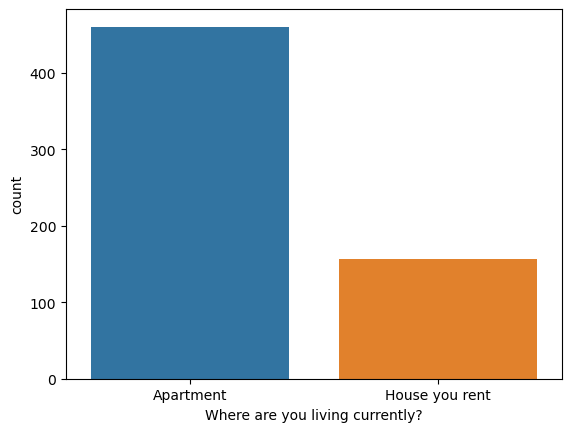

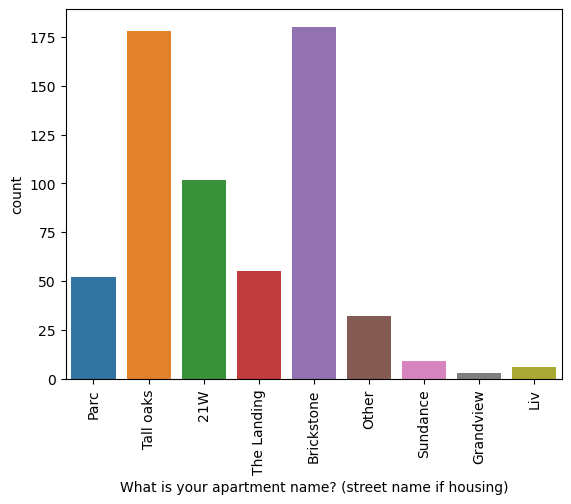

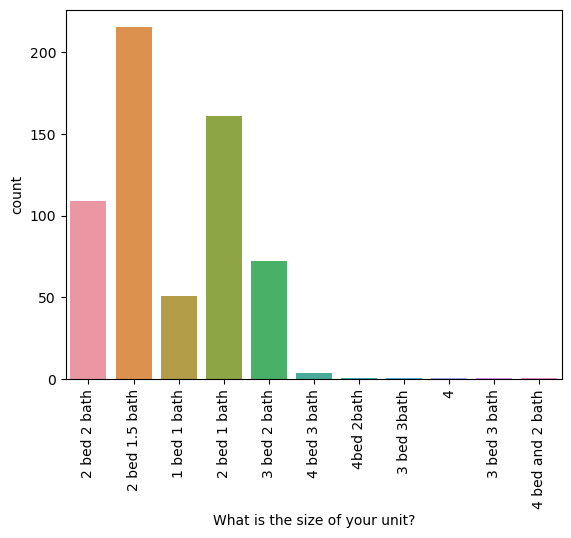

In [82]:
# Where are you living currently?
sns.countplot(x='Where are you living currently?', data=data2)
plt.show()

# What is your apartment name? (street name if housing)
a = sns.countplot(x='What is your apartment name? (street name if housing)', data=data2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.show()

# What is the size of your unit?
b = sns.countplot(x='What is the size of your unit?', data=data2)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()


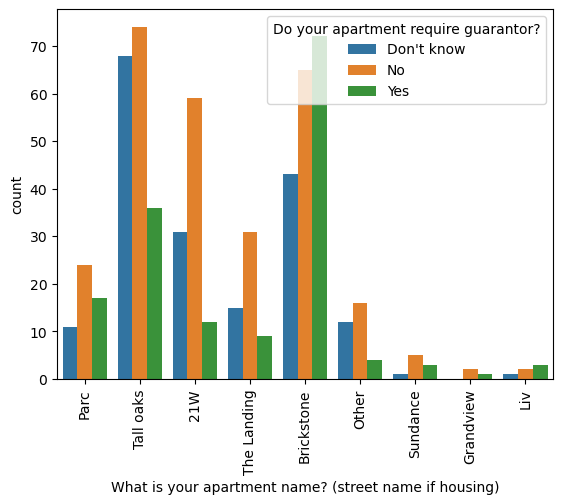

In [83]:
z= sns.countplot(x='What is your apartment name? (street name if housing)', hue='Do your apartment require guarantor?', data=data2)
z.set_xticklabels(z.get_xticklabels(), rotation=90)
plt.show()

Majority of people are living in Apartments.

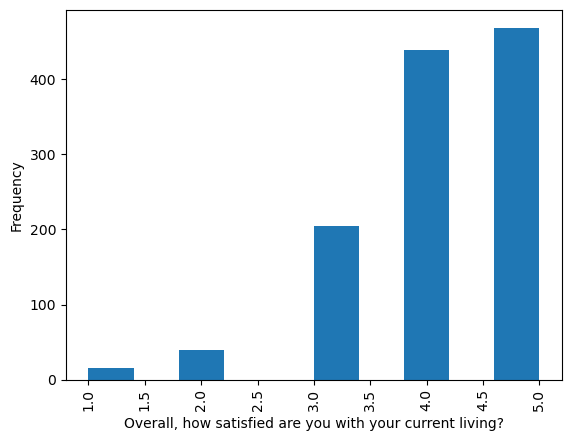

In [84]:
# Histogram of a numerical column
# Overall, how satisfied are you with your current living?
plt.hist(data['Overall, how satisfied are you with your current living?'], bins=10)
plt.xlabel('Overall, how satisfied are you with your current living?')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [85]:
# Configure settings to display decimal numbers rather than scientific notation.
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data2.describe()

,How long have you been in Wichita? (in months),How many people are staying in your unit?,"Overall, how satisfied are you with your current living?","On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)",What are your thoughts on the level of safety in the vicinity of your residence?,What is the total monthly rent of your unit?,"What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?","If yes, what is your monthly rental insurance?","What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?",What is the duration of time it takes you to walk from your residence to the closest transit stop?,What is the duration of time it takes for transit to reach from your stop to the university?,"What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?",What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?
count,617.000,615.000,617.000,617.000,617.000,555.000,617.000,583.000,574.000,617.000,617.000,617.000,617.000
mean,13.883,4.397,4.034,4.005,4.120,927.963,651.250,24.914,348.443,5.774,8.361,9.566,13.322
std,83.675,1.207,0.923,0.971,0.886,212.344,620.203,209.277,325.836,5.074,4.850,8.555,10.064
min,0.700,1.000,1.000,1.000,1.000,8.000,1.000,0.000,0.000,1.100,2.000,1.000,1.000
25%,7.000,4.000,4.000,3.000,4.000,810.000,200.000,0.000,170.000,2.000,5.000,5.000,5.000
50%,9.000,4.000,4.000,4.000,4.000,950.000,400.000,0.000,250.000,5.000,7.000,10.000,10.000
75%,10.000,5.000,5.000,5.000,5.000,1047.500,1000.000,20.000,400.000,7.000,10.000,10.000,15.000
max,2024.000,8.000,5.000,5.000,5.000,1600.000,5000.000,5000.000,2300.000,55.000,45.000,120.000,120.000


# LINEAR REGRESSION

In [86]:
#Necesary imports required for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
Features_original = data2.columns
print('Original Features Count', len(Features_original))
print('Original Features', Features_original)

Original Features Count 21
Original Features Index(['Where are you living currently?',
       'How long have you been in Wichita? (in months)',
       'What is your apartment name? (street name if housing)',
       'How many people are staying in your unit?',
       'What is the size of your unit?',
       'Overall, how satisfied are you with your current living?',
       'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
       'What are your thoughts on the level of safety in the vicinity of your residence?',
       'What is the total monthly rent of your unit?',
       'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
       'Are you paying rental insurance for your unit monthly?',
       'If yes, what is your monthly rental insurance?',
       'What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in you

Certain categorical variables in the dataset must be changed to dummies in order for the data to be passed through the linear regression model.

In [88]:
data2 = pd.get_dummies(data2, columns = ['Where are you living currently?','What is your apartment name? (street name if housing)','What is the size of your unit?','Are you paying rental insurance for your unit monthly?','Do your apartment require guarantor?','Is your apartment pet friendly?','What is your preferred mode of transportation when leaving your residence?','What type of laundry amenities are available in your accommodation?'], drop_first = True) 

In [89]:
data2

,How long have you been in Wichita? (in months),How many people are staying in your unit?,"Overall, how satisfied are you with your current living?","On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)",What are your thoughts on the level of safety in the vicinity of your residence?,What is the total monthly rent of your unit?,"What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?","If yes, what is your monthly rental insurance?","What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?",What is the duration of time it takes you to walk from your residence to the closest transit stop?,...,What is the size of your unit?_4 bed 3 bath,What is the size of your unit?_4 bed and 2 bath,What is the size of your unit?_4bed 2bath,Are you paying rental insurance for your unit monthly?_Yes,Do your apartment require guarantor?_No,Do your apartment require guarantor?_Yes,Is your apartment pet friendly?_No,Is your apartment pet friendly?_Yes,What type of laundry amenities are available in your accommodation?_In unit/ home,What type of laundry amenities are available in your accommodation?_Need to go to other place for this facility
0,45.000,6.000,3.000,3.000,5.000,NaN,1.000,0.000,4.000,3.000,...,0,0,0,0,0,0,0,1,0,1
7,15.000,4.000,4.000,3.000,5.000,825.000,300.000,0.000,225.000,5.000,...,0,0,0,0,0,0,0,1,0,1
8,9.000,3.000,5.000,5.000,5.000,NaN,350.000,0.000,600.000,3.000,...,0,0,0,0,0,0,0,1,0,0
9,9.000,6.000,4.000,3.000,3.000,1050.000,200.000,0.000,200.000,2.000,...,0,0,0,0,0,0,0,1,0,0
14,9.000,2.000,2.000,2.000,3.000,795.000,335.000,0.000,180.000,2.000,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,6.000,3.000,4.000,4.000,4.000,700.000,1000.000,0.000,200.000,15.000,...,0,0,0,1,0,0,0,1,1,0
1189,10.000,4.000,4.000,3.000,5.000,880.000,600.000,21.000,220.000,5.000,...,0,0,0,1,1,0,0,1,0,0
1192,10.000,4.000,5.000,3.000,5.000,880.000,600.000,21.000,300.000,5.000,...,0,0,0,1,1,0,0,1,0,0
1193,22.000,4.000,4.000,4.000,4.000,810.000,250.000,0.000,350.000,5.000,...,0,0,0,1,1,0,0,1,1,0


In [103]:
from sklearn.impute import SimpleImputer
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd

# Example of loading data - replace with your actual data source
# data2 = pd.read_csv('your_data.csv')

# Assuming 'target' is the column you want to predict
# Make sure to replace 'target' with the actual name of your target variable column
y = data2['Overall, how satisfied are you with your current living?']
X = data2.drop(columns=['Overall, how satisfied are you with your current living?'], axis=1)

# Impute the missing values in X
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Fit the Linear Regression model with the imputed data
reg = linear_model.LinearRegression()
reg.fit(X_imputed, y)
print('Coefficients: \n', reg.coef_)

# If you want to use statsmodels, add a constant to the imputed data and fit the model
X_imputed_with_const = sm.add_constant(X_imputed)
model1 = sm.OLS(y, X_imputed_with_const).fit()
print(model1.summary())

Coefficients: 
 [-2.30192971e-05 -5.37029244e-03  4.92524415e-01  2.31429301e-01
  8.72736899e-06  4.03715952e-05  2.63114476e-04 -3.74015203e-05
 -3.00054948e-03 -1.64173738e-03  5.74086425e-03 -1.28729903e-02
  1.99142777e-02 -3.35590364e-01 -2.35511365e-01 -5.77670706e-01
 -3.15201791e-01 -2.42311216e-01 -3.32644597e-01 -1.85191626e-01
 -5.08481871e-03  2.49752254e-01  2.44237635e-01  3.35513496e-01
  3.75544191e-01  4.96471560e-01 -3.18847162e-01  6.93497931e-01
  1.90047686e-01  6.54172863e-01  1.46999573e+00  4.74665896e-02
  4.53467753e-02  1.43456385e-01  1.94711334e-01  4.75748150e-01
  1.63536775e-01  1.63394866e-01]
                                               OLS Regression Results                                               
Dep. Variable:     Overall, how satisfied are you with your current living?   R-squared:                       0.559
Model:                                                                  OLS   Adj. R-squared:                  0.530
Method:       

## FILTER METHOD

Using the Filter method with Chi-Square scores for filtering out the best 20 features.

In [92]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer

In [93]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 1197
Data columns (total 39 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   How long have you been in Wichita? (in months)                                                                            617 non-null    float64
 1   How many people are staying in your unit?                                                                                 615 non-null    float64
 2   Overall, how satisfied are you with your current living?                                                                  617 non-null    float64
 3   On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)  617 non-null

In [94]:
# Create an imputer with a strategy (e.g., mean, median, or constant)
imputer = SimpleImputer(strategy='mean')
#x is independent variables
X = data2.drop(columns=['Overall, how satisfied are you with your current living?'])
#y is dependent variable
y = data2['Overall, how satisfied are you with your current living?']

In [95]:
# Fit and transform the imputer on your feature matrix X
X_imputer = imputer.fit_transform(X)

In [96]:
# Apply chi-square test
chi_square_selector = SelectKBest(chi2, k=25)
X_kbest = chi_square_selector.fit_transform(X_imputer, y)

In [97]:
# Get selected feature indices
feature_indices = chi_square_selector.get_support(indices=True)

In [98]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 38
Reduced number of features: 25


In [99]:
# Get selected feature names
selected_features = X.columns[feature_indices]

In [100]:
print("SELECTED FEATURES:\n", selected_features)

SELECTED FEATURES:
 Index(['How long have you been in Wichita? (in months)',
       'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
       'What are your thoughts on the level of safety in the vicinity of your residence?',
       'What is the total monthly rent of your unit?',
       'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
       'If yes, what is your monthly rental insurance?',
       'What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?',
       'What is the duration of time it takes you to walk from your residence to the closest transit stop?',
       'What is the duration of time it takes for transit to reach from your stop to the university?',
       'What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?',
       'What is 

In [101]:
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

#x is independent variables
X = data2[selected_features].values
#y is dependent variable
y = data2['Overall, how satisfied are you with your current living?']

# Create an imputer to handle missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your feature matrix
X_imputer = imputer.fit_transform(X)



In [102]:
reg_model = linear_model.LinearRegression()
reg_model.fit(X_imputer,y)
print('coefficients: \n', reg_model.coef_)
c = sm.add_constant(X_imputer)
model = sm.OLS(y,c).fit()
model.summary()

coefficients: 
 [-2.13102069e-05  4.94582557e-01  2.18268169e-01  6.61890903e-05
  2.18139847e-05  2.76970523e-04 -2.13918546e-05 -4.71596450e-03
 -3.31288931e-03  5.46237640e-03 -1.23520553e-02 -2.15173494e-01
 -4.24916604e-01 -7.51508816e-02 -8.36121969e-02  5.90871134e-02
  2.01087925e-01  1.90512555e-01  2.21079061e-01  2.98394994e-01
 -6.28098530e-01 -7.45543230e-02  2.97362559e-01  5.09003093e-01
  1.62963367e-01]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                               
====================================================================================================================
Dep. Variable:     Overall, how satisfied are you with your current living?   R-squared:                       0.545
Model:                                                                  OLS   Adj. R-squared:                  0.526
Method:                                                       Least Squares   F-statistic:                     28.31
Date:                                                      Mon, 11 Dec 2023   Prob (F-statistic):           2.05e-84
Time:                                                              20:56:45   Log-Likelihood:                -582.34
No. Observations:                                                       617   AIC:                             1217.
Df Residuals:                                                           591   BIC:                             1332.
Df Model:                                                                25                                         
Covariance Type:                                                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6631      0.227      2.926      0.004       0.218       1.108
x1         -2.131e-05      0.000     -0.069      0.945      -0.001       0.001
x2             0.4946      0.036     13.663      0.000       0.423       0.566
x3             0.2183      0.040      5.447      0.000       0.140       0.297
x4          6.619e-05      0.000      0.452      0.652      -0.000       0.000
x5          2.181e-05   4.21e-05      0.518      0.604   -6.08e-05       0.000
x6             0.0003      0.000      2.054      0.040    1.21e-05       0.001
x7         -2.139e-05   8.27e-05     -0.259      0.796      -0.000       0.000
x8            -0.0047      0.006     -0.796      0.426      -0.016       0.007
x9            -0.0033      0.006     -0.591      0.555      -0.014       0.008
x10            0.0055      0.004      1.405      0.161      -0.002       0.013
x11           -0.0124      0.003     -3.757      0.000      -0.019      -0.006
x12           -0.2152      0.078     -2.753      0.006      -0.369      -0.062
x13           -0.4249      0.270     -1.575      0.116      -0.955       0.105
x14           -0.0752      0.148     -0.507      0.612      -0.366       0.216
x15           -0.0836      0.081     -1.031      0.303      -0.243       0.076
x16            0.0591      0.111      0.534      0.594      -0.158       0.277
x17            0.2011      0.104      1.929      0.054      -0.004       0.406
x18            0.1905      0.100      1.900      0.058      -0.006       0.387
x19            0.2211      0.109      2.023      0.044       0.006       0.436
x20            0.2984      0.120      2.484      0.013       0.062       0.534
x21           -0.6281      0.671     -0.936      0.350      -1.946       0.690
x22           -0.0746      0.370     -0.201      0.841      -0.802       0.653
x23            0.2974      0.150      1.984      0.048       0.003       0.592
x24            0.5090      0.100      5.080      0.000       0.312       0.706
x25            0.1630      0.084      1.942      0.053      -0.002       0.328
==============================================================================
Omnibus:                       80.692   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.661
Skew:                          -0.694   Prob(JB):                     3.26e-43
Kurtosis:                       5.384   Cond. No.         